In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from joblib import dump, load

%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Microproyecto/Real estate valuation data set.xlsx")
df.shape

(414, 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.describe

<bound method NDFrame.describe of       No  X1 transaction date  X2 house age  \
0      1          2012.916667          32.0   
1      2          2012.916667          19.5   
2      3          2013.583333          13.3   
3      4          2013.500000          13.3   
4      5          2012.833333           5.0   
..   ...                  ...           ...   
409  410          2013.000000          13.7   
410  411          2012.666667           5.6   
411  412          2013.250000          18.8   
412  413          2013.000000           8.1   
413  414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4

3-EDA

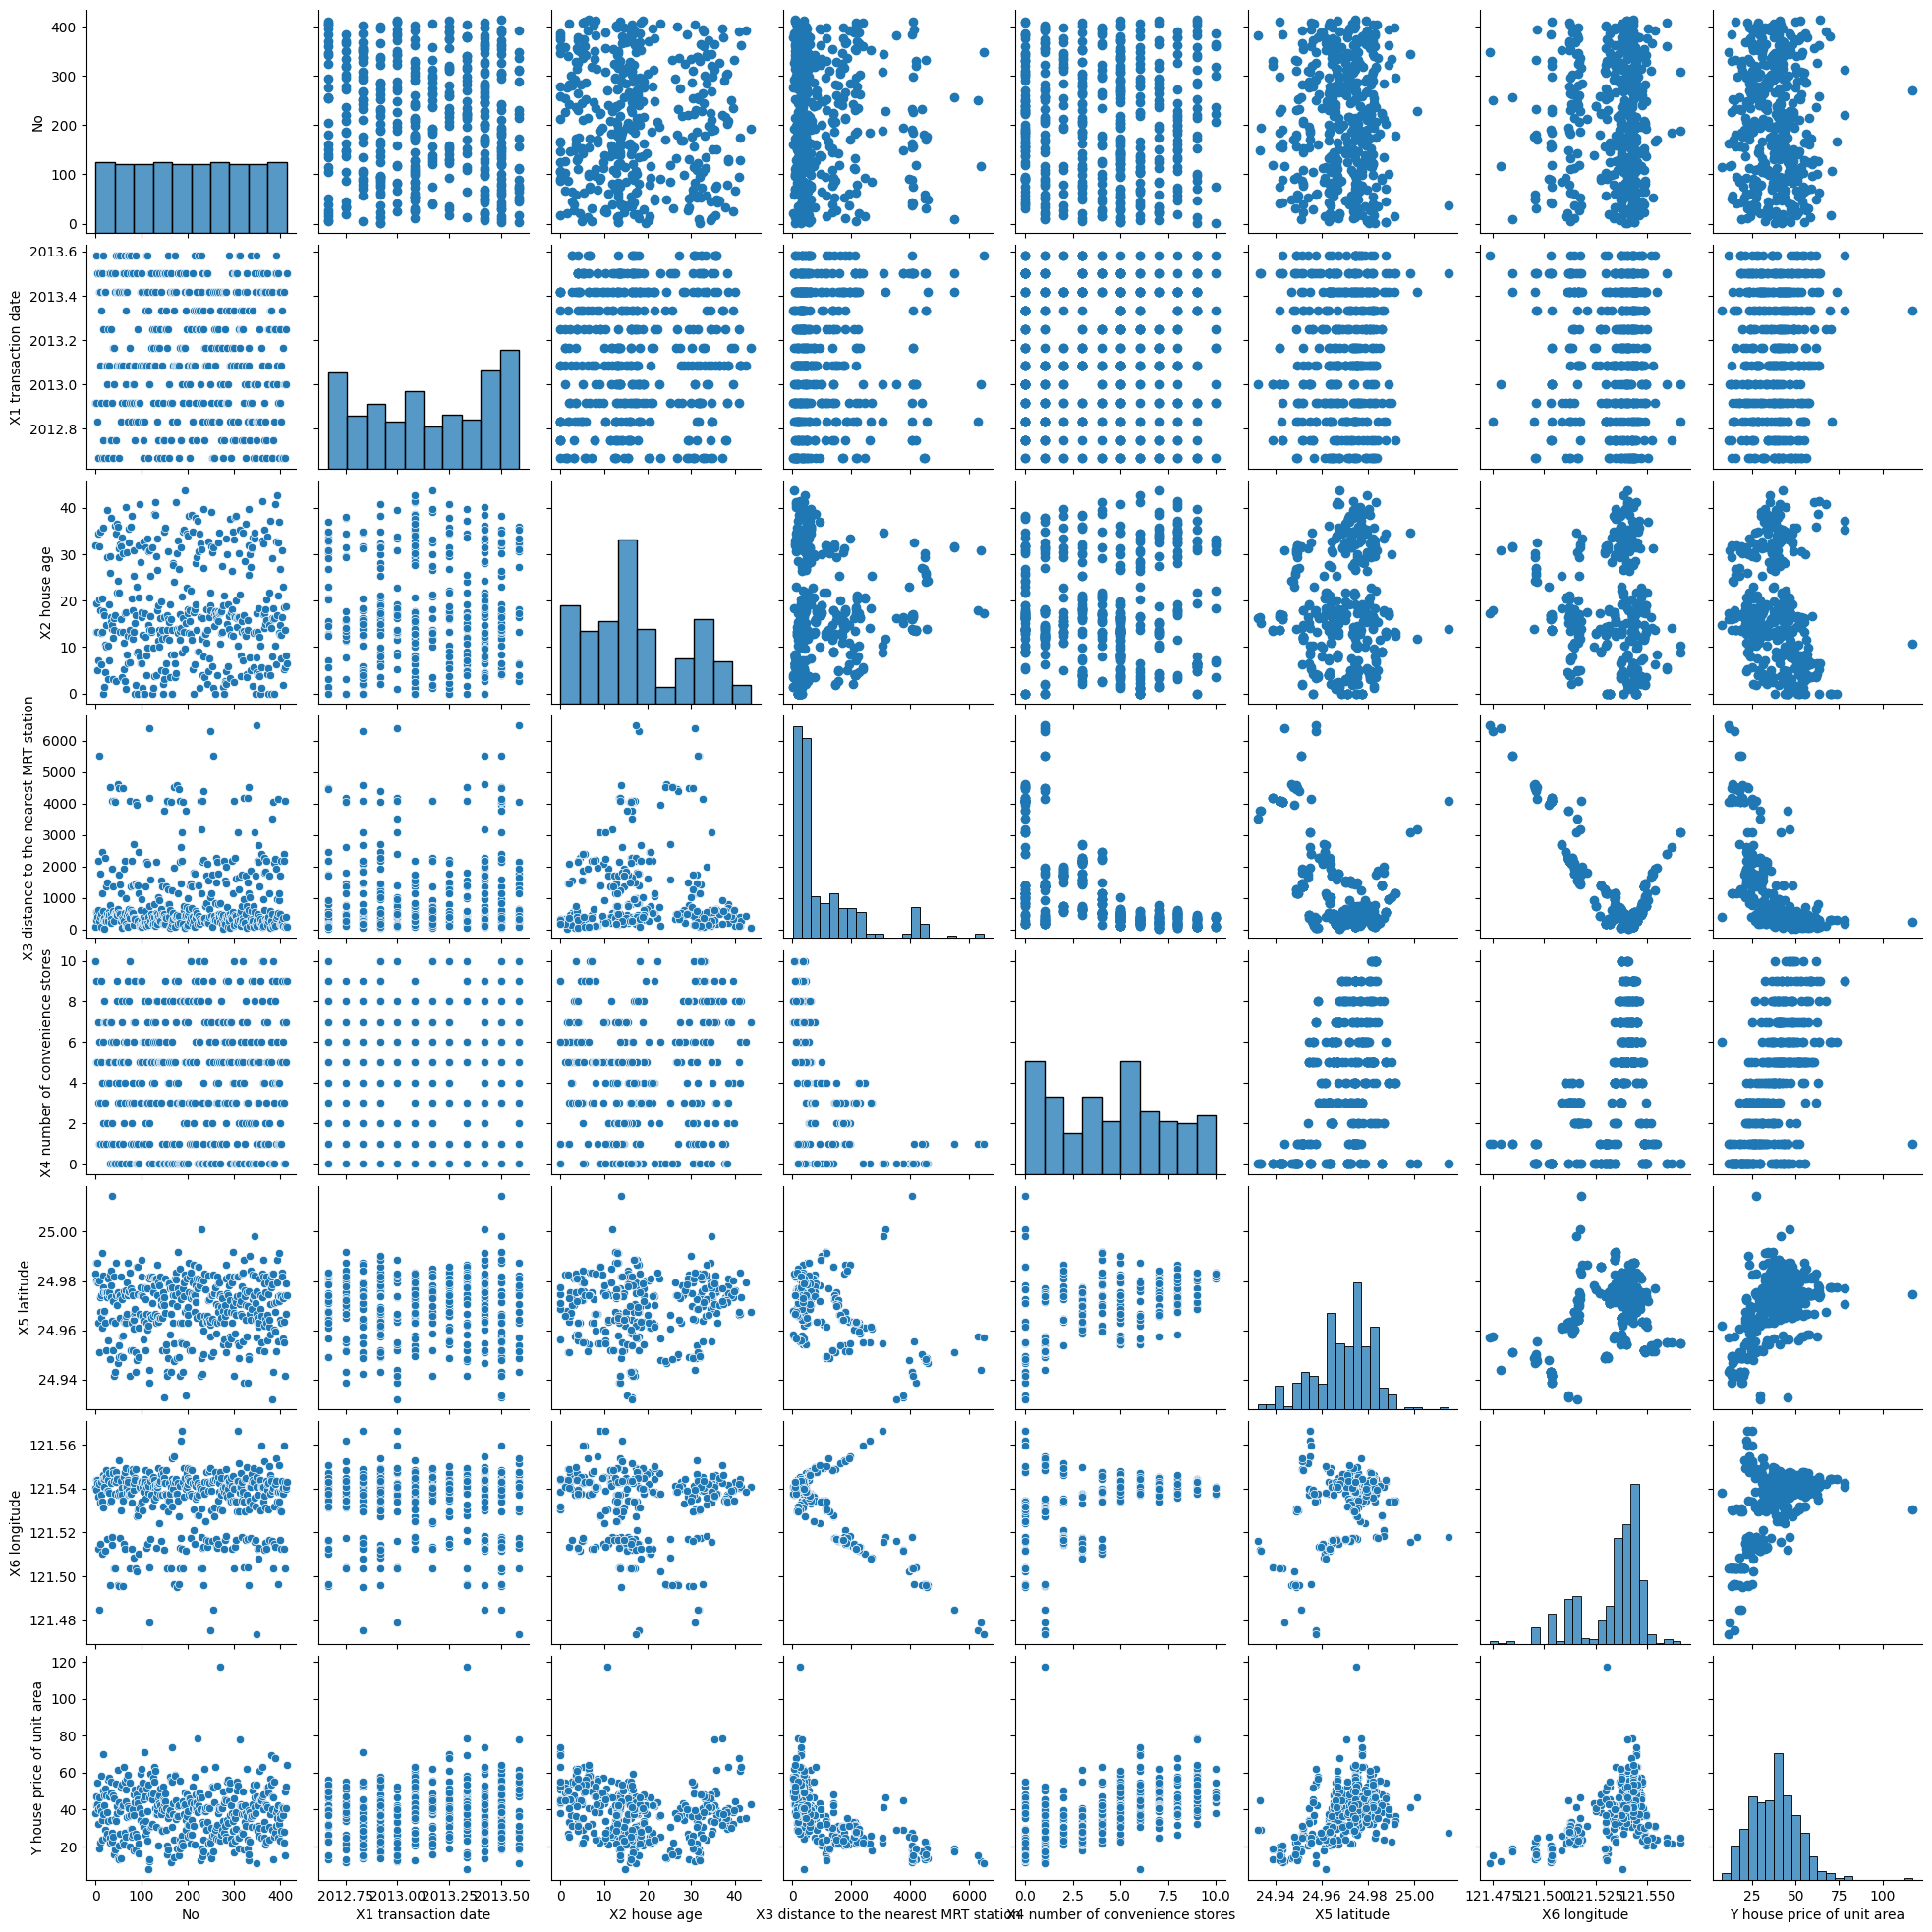

In [ ]:
#Graficos de dispersion para visualizar la correlacion entre variables
g= sns.pairplot(df)
g.map_upper(plt.scatter)

In [ ]:
# Matriz de correlacion

df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

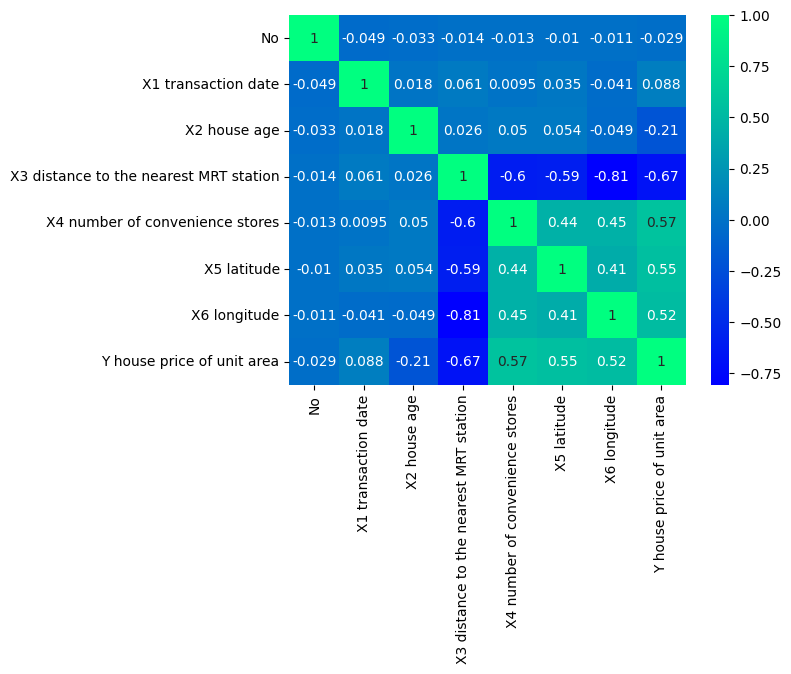

In [ ]:
#Mapa de calor para la visualizacion de la correlacion de las variables
sns.heatmap(df.corr(), annot=True,cmap='winter')

Text(0.5, 9.444444444444438, 'house price of unit area')

<Figure size 1000x400 with 0 Axes>

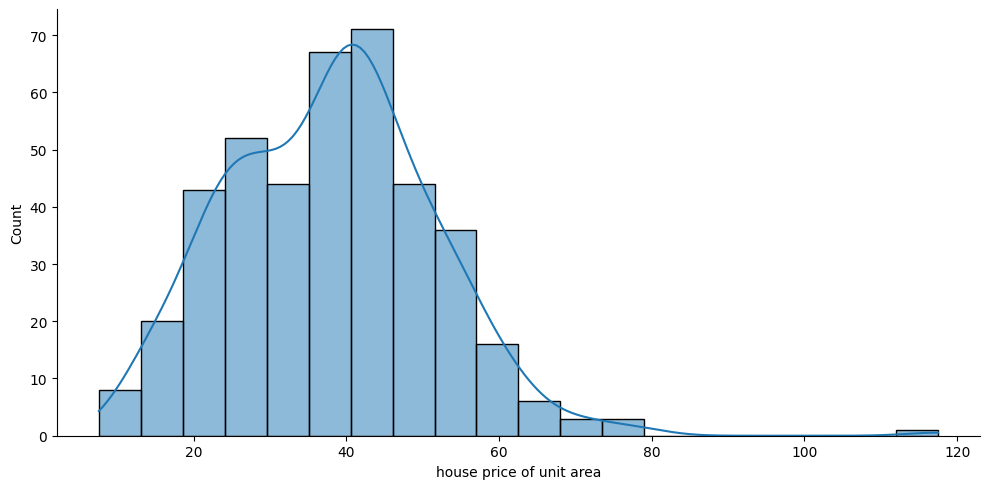

In [ ]:
#distribución de la variable 'Y house price of unit area' del conjunto de datos df utilizando un histograma y una gráfica de densidad de probabilidad (KDE)
plt.figure(figsize=(10,4))
sns.displot(df['Y house price of unit area'],kde=True,bins=20, aspect=2)
plt.xlabel('house price of unit area')


<Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>

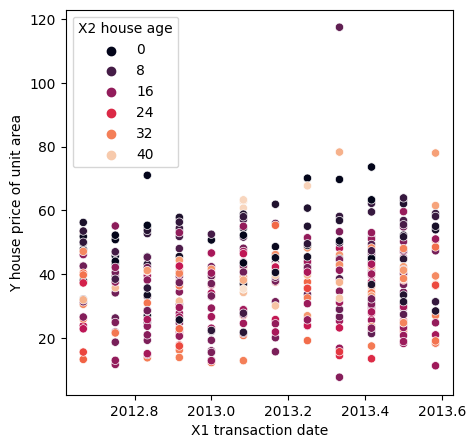

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X1 transaction date'] , hue= 'X2 house age', palette="rocket")

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

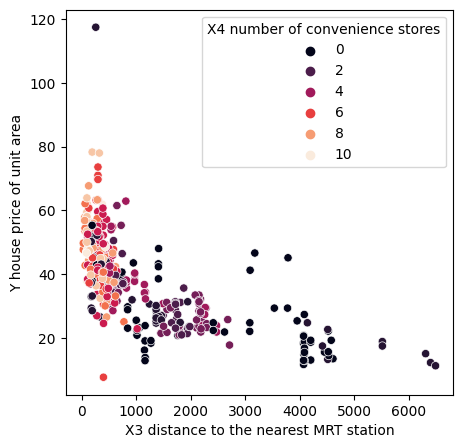

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X3 distance to the nearest MRT station'] , hue= 'X4 number of convenience stores', palette="rocket")

<Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>

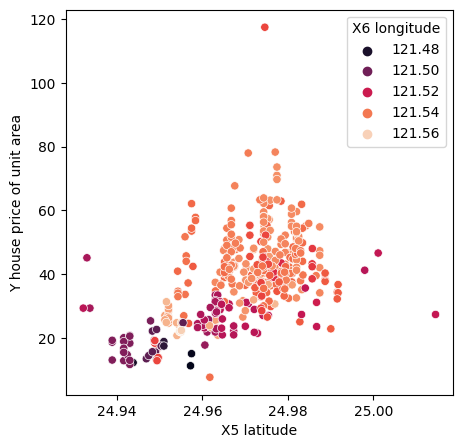

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X5 latitude'] , hue= 'X6 longitude', palette="rocket")

First split up the data into an X array that contains the features to train on, and a y array with the target variable, in this case the (Y house price of unit area) column.

In [ ]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

Split a data into train and test

Training a Polynomial Regression Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=2, include_bias=False)
poly_features=PF.fit_transform(X)

In [ ]:
poly_features.shape

(414, 35)

In [ ]:
# train out model on the training set and then use the test set to evaluate the model.


X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

Test Data Prediction

In [ ]:
y_pred=polymodel.predict(X_test)

In [ ]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.383903,2.816097
347,11.2,3.925179,7.274821
307,24.7,17.436290,7.263710
299,46.1,47.144074,-1.044074
391,31.3,27.342887,3.957113


Model Evalution

In [ ]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.490628
MSE,32.399141
RMSE,5.692024


Compare Linear regrassion Vs Polynomial Regression

In [ ]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [ ]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,4.490628,5.373081
MSE,32.399141,45.879129
RMSE,5.692024,6.773413


Adjust model parameters

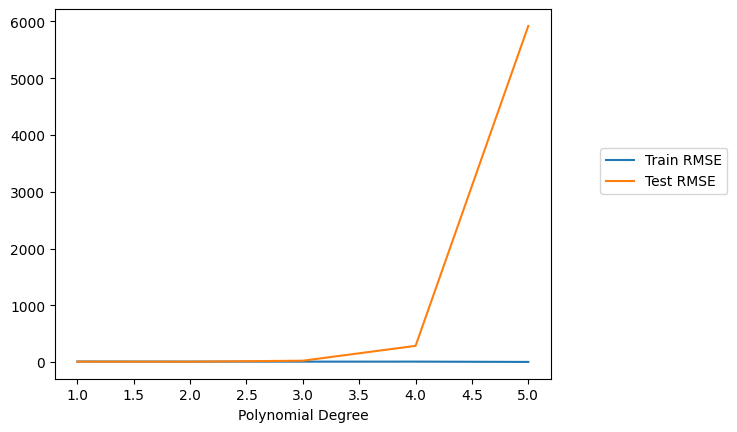

In [ ]:
train_RMSE_list=[]
test_RMSE_list=[]

for d in range(1,10):

    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)

    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)

    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')

plt.legend(loc=(1.1, 0.5))